The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. All right, without further ado, let's get started!
______________________________________

The `CIFAR-10` dataset is a widely used benchmark in computer vision, comprising 60,000 32x32 color images divided into 10 classes. It is a popular choice for image classification tasks and deep learning experimentation. This section will walk you through using CIFAR-10 to train a CNN model, including steps like data loading, preprocessing, CNN architecture design, training, and evaluation. Join us on this journey to explore image classification using CIFAR-10!

### Import Modules/Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


### Loading and Preprocessing the Dataset

- Import the necessary libraries, including TensorFlow, Keras, and Matplotlib.
- Use the datasets.cifar10.load_data() function from Keras to load the CIFAR-10 dataset, splitting it into training and testing sets.
- Normalize the pixel values of the images by dividing the training and testing sets by 255.0.

In [2]:
# Load and split the CIFAR-10 dataset into training and testing sets

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Normalize the pixel values of the images to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

### 💭 Exploring the Dataset


- Print the shapes of the training and testing data arrays to understand the dataset's structure.
- Define the class names corresponding to the 10 categories in CIFAR-10, which will be used for labeling visualizations.
- plot some images of this dataset

### Print the shapes of the training and testing data 

In [4]:
# Print the shapes of the training and testing data arrays
print("shape of X_train :", X_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of y_train :", y_train.shape)
print("shape of y_test :", y_test.shape)

shape of X_train : (50000, 32, 32, 3)
shape of X_test : (10000, 32, 32, 3)
shape of y_train : (50000, 1)
shape of y_test : (10000, 1)


###  let's plot the first 25 images from the training set and display the class name below each image:



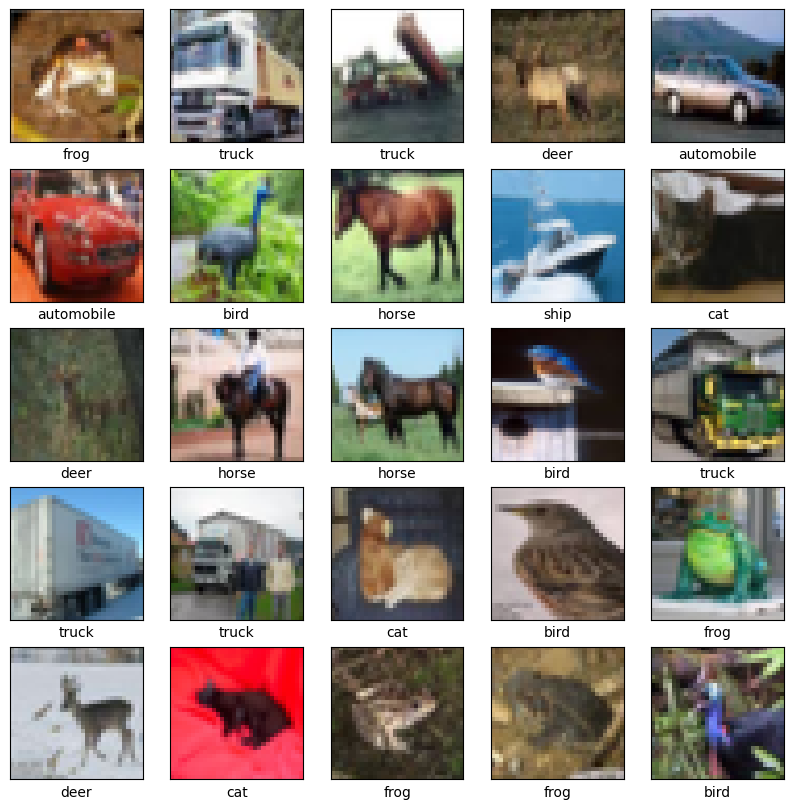

In [ ]:
# Define the class names for the CIFAR-10 dataset

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
# Visualize a subset of the training images with their corresponding class labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

_______________________

### Example of CNN model 

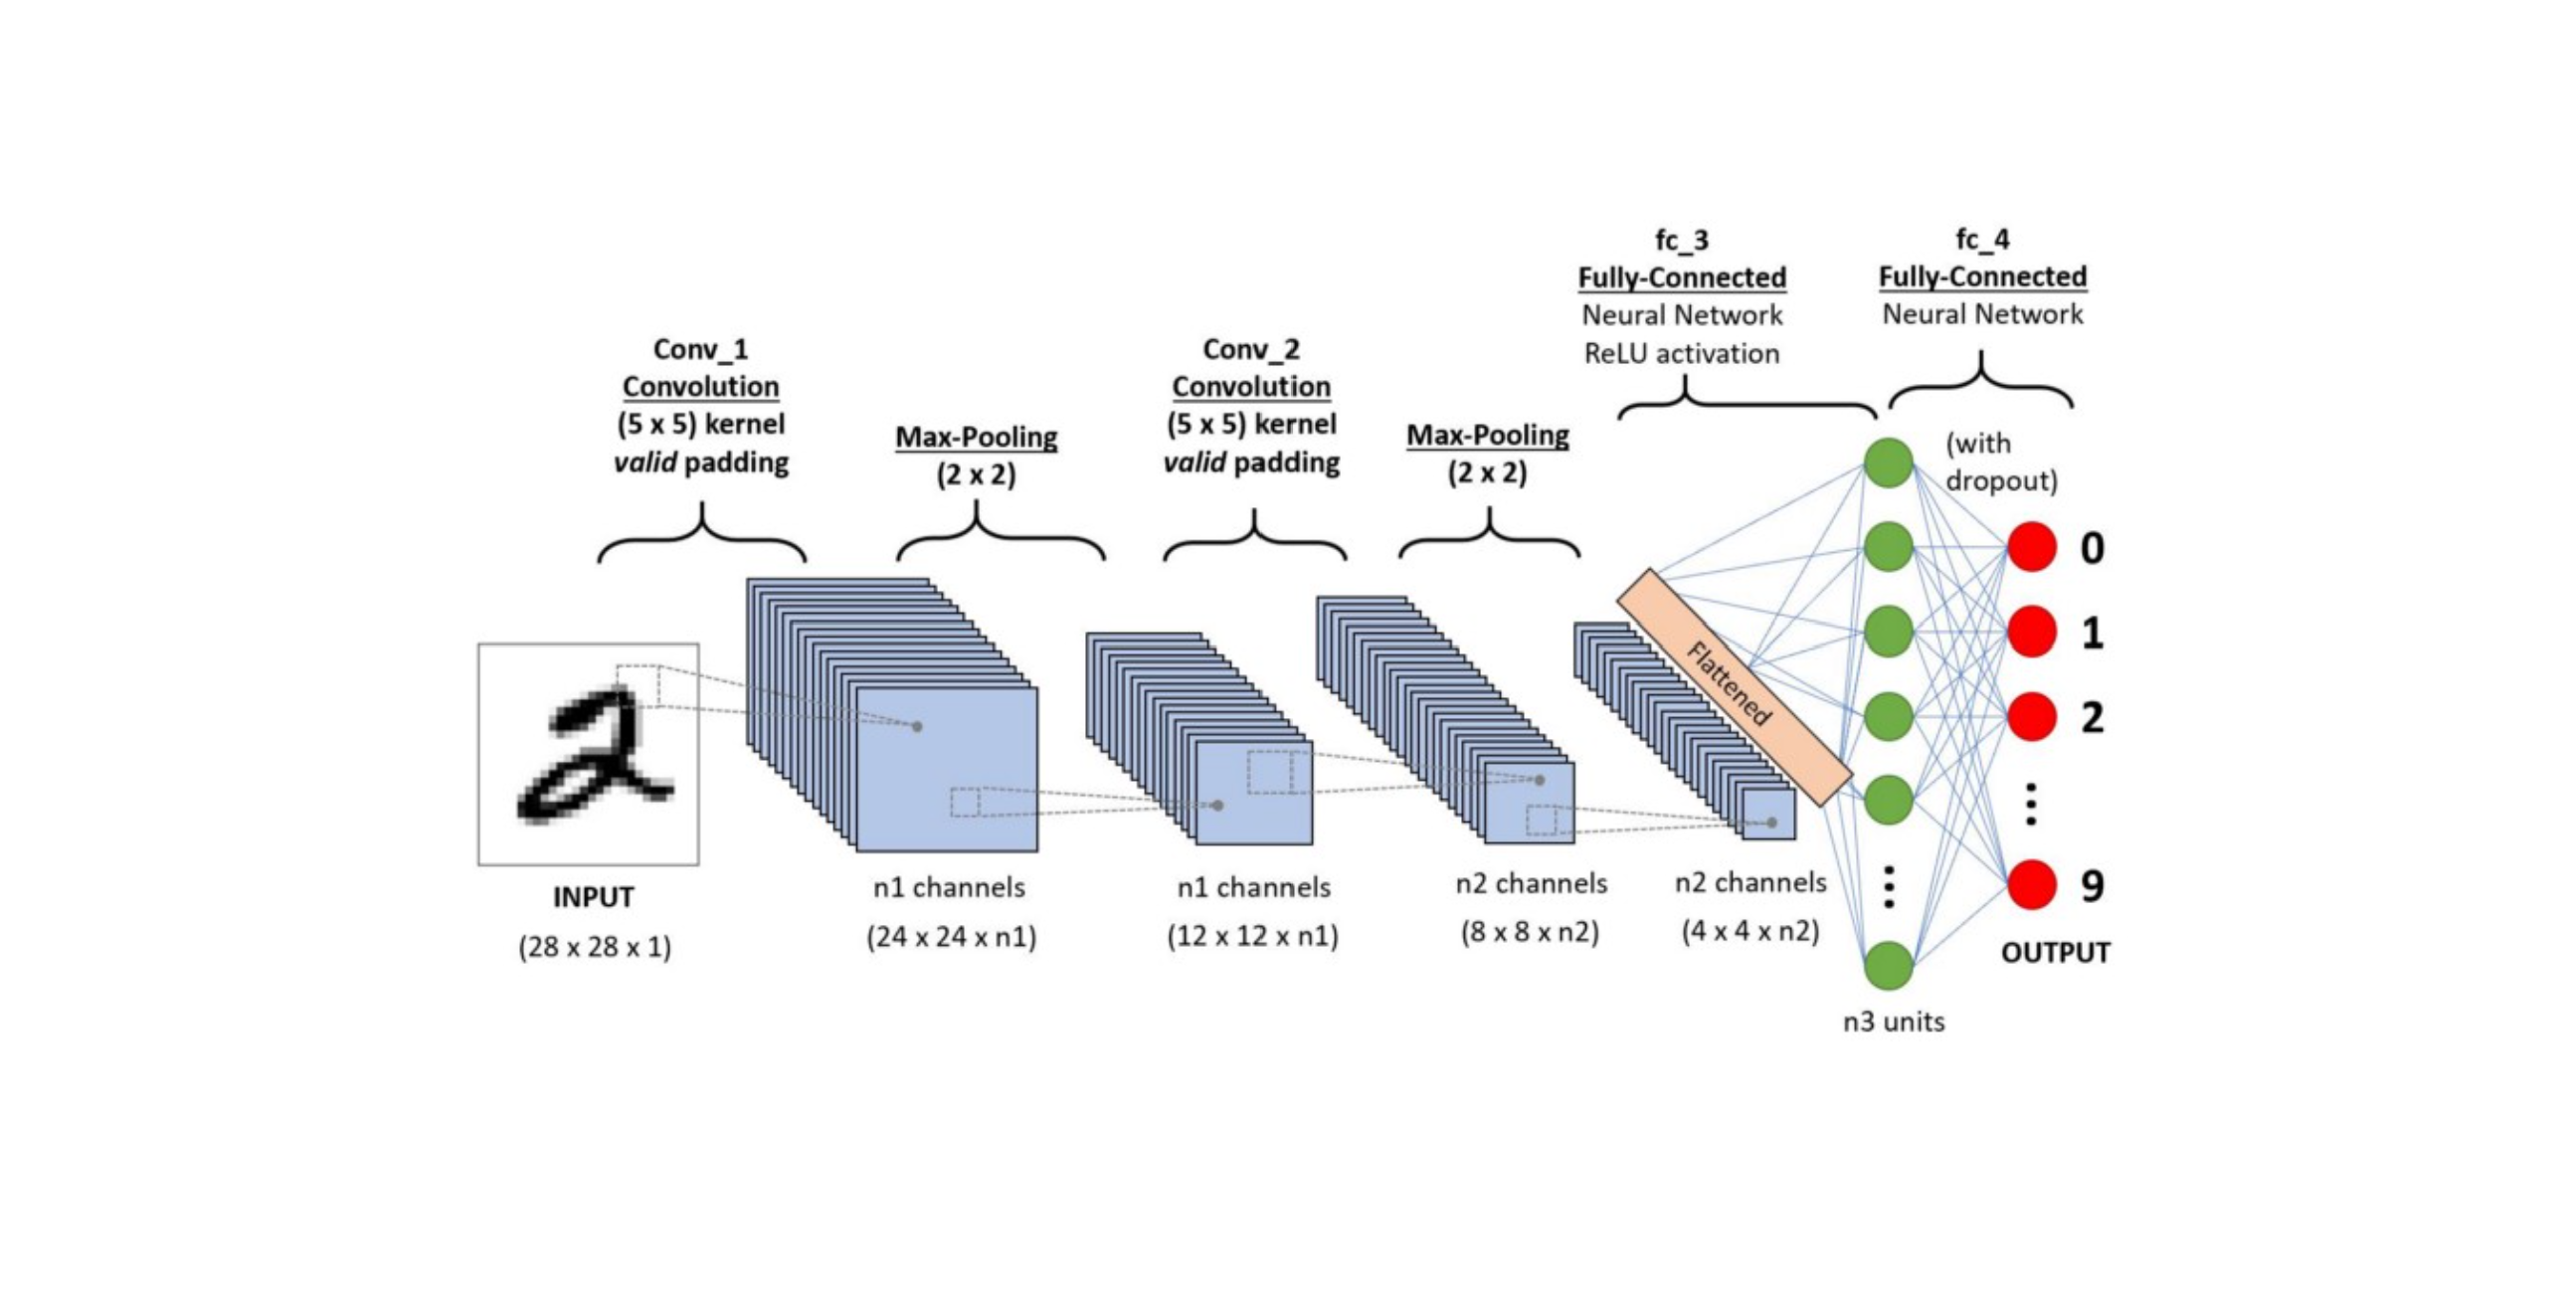


### Creating and Training the CNN Model

#### 💭 First

- Create a sequential model using the models.Sequential() API from Keras. This allows us to stack layers in a sequential manner.
- Add a Conv2D layer to the model with 64 filters, a specified kernel size(e.g.(3, 3)), an activation function, and an input shape of (32, 32, 3) to handle the RGB images in CIFAR-10.
- Add a MaxPooling2D layer to downsample the feature maps obtained from the previous layer.
- Add another Conv2D layer with 128 filters and a kernel size of (3, 3), followed by a Flatten layer to convert the 2D feature maps into a 1D vector.
- Finally, add a Dense layer with 10 units representing the number of classes in CIFAR-10.

  - you can see the model structure by using summary method.

  - feel free to change the model design and see different results:)


#### 💭Then

- Compile the model using the SparseCategoricalCrossentropy loss function, the Adam optimizer, and the accuracy metric.



- Train the model using the training data, specifying the batch size , the number of epochs (e.g., 10), and the validation data.



In [ ]:
ConvSize = 3
ActivationFun = 'relu'
BatchSize = 32

In [ ]:
# Create a CNN model with convolutional and dense layers
model = models.Sequential()
model.add(layers.Conv2D(64, (ConvSize, ConvSize), activation = ActivationFun, input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation=ActivationFun))
model.add(layers.Flatten())
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 flatten_3 (Flatten)         (None, 21632)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                216330    
                                                                 
Total params: 291,978
Trainable params: 291,978
Non-trainable params: 0
________________________________________________

In [ ]:
def create_and_train_model(ConvSize, ActivationFun, BatchSize):

  # Create a CNN model with convolutional and dense layers
  model = models.Sequential()
  model.add(layers.Conv2D(64, (ConvSize, ConvSize), activation = ActivationFun, input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation=ActivationFun))
  model.add(layers.Flatten())
  model.add(layers.Dense(10))

  # Compile and train the model using the training data
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, y_train, batch_size= BatchSize, epochs=10, validation_data=(X_test, y_test))

  return history.history['val_accuracy']

In [16]:
def plott(parameter_name, parameter_list, accuracy_list):

  plt.figure(figsize=(10, 6))

  for i, v in enumerate(parameter_list):
      plt.plot(range(0, len(accuracy_list[0])), accuracy_list[i], label=f'{parameter_name} : {v}')

  plt.xlabel('Epochs')
  plt.ylabel('Validation Accuracy')
  plt.title(f'Effect of {parameter_name} on CNN Classification')
  plt.legend()
  plt.grid(True)
  plt.show()


_______________________

### Now using the model that you designed above and changing the batch size , filter size  and activation function

_______________________

## 💭Exploring the Effect of Filter Size on CNN Classification accuracy

- Create models with different filter sizes (e.g., 3x3, 5x5, 7x7).
- Plot the accuracy of each model against the filter size.
- Analyze the plot to understand the relationship between filter size and classification accuracy.

Epoch 1/10
1563/1563 [==============================] - 37s 5ms/step - loss: 1.3487 - accuracy: 0.5226 - val_loss: 1.1550 - val_accuracy: 0.5952
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0045 - accuracy: 0.6536 - val_loss: 0.9588 - val_accuracy: 0.6641
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8582 - accuracy: 0.7019 - val_loss: 0.9336 - val_accuracy: 0.6791
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7610 - accuracy: 0.7367 - val_loss: 0.9125 - val_accuracy: 0.6908
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6788 - accuracy: 0.7664 - val_loss: 0.8959 - val_accuracy: 0.6990
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6008 - accuracy: 0.7904 - val_loss: 0.9421 - val_accuracy: 0.6954
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5384 - accuracy: 0.8121 - val_loss: 0.9762 - val_accuracy

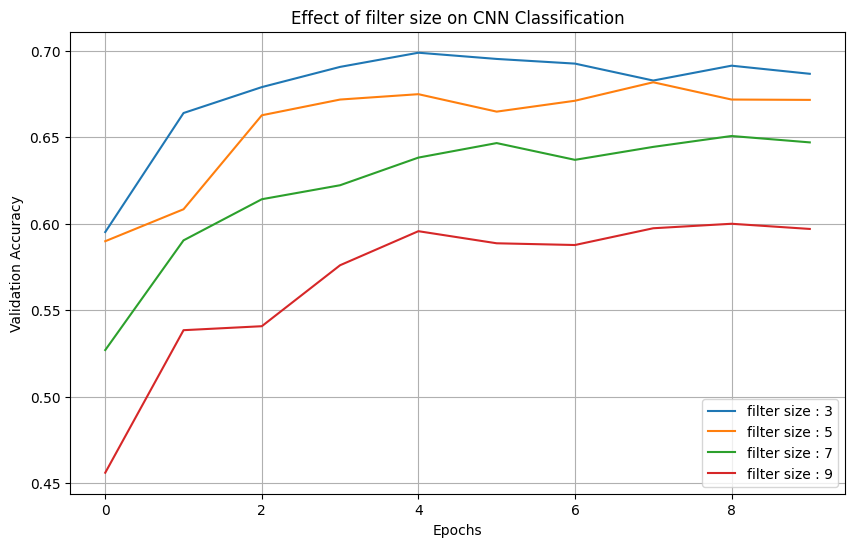

In [ ]:
acc_list = []
parameter_name = 'filter size'
parameter_list = [3, 5, 7, 9]
for p in parameter_list:
  acc_list.append(create_and_train_model(p, ActivationFun, BatchSize))
  print("*"*100)

plott(parameter_name, parameter_list, acc_list)

## 💭Exploring the Effect of batch Size on CNN Classification accuracy

- Create models with different batch sizes (e.g., 8, 16, 32).
- Plot the accuracy of each model against the batch size.
- Analyze the plot to understand the relationship between batch size and classification accuracy.

Epoch 1/10
6250/6250 [==============================] - 24s 4ms/step - loss: 1.3486 - accuracy: 0.5190 - val_loss: 1.0942 - val_accuracy: 0.6148
Epoch 2/10
6250/6250 [==============================] - 21s 3ms/step - loss: 1.0225 - accuracy: 0.6426 - val_loss: 1.0276 - val_accuracy: 0.6366
Epoch 3/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.8860 - accuracy: 0.6944 - val_loss: 1.0358 - val_accuracy: 0.6512
Epoch 4/10
6250/6250 [==============================] - 23s 4ms/step - loss: 0.7927 - accuracy: 0.7264 - val_loss: 1.0410 - val_accuracy: 0.6490
Epoch 5/10
6250/6250 [==============================] - 22s 3ms/step - loss: 0.7221 - accuracy: 0.7521 - val_loss: 1.0440 - val_accuracy: 0.6552
Epoch 6/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.6560 - accuracy: 0.7720 - val_loss: 1.0397 - val_accuracy: 0.6698
Epoch 7/10
6250/6250 [==============================] - 21s 3ms/step - loss: 0.5951 - accuracy: 0.7933 - val_loss: 1.0957 - val_ac

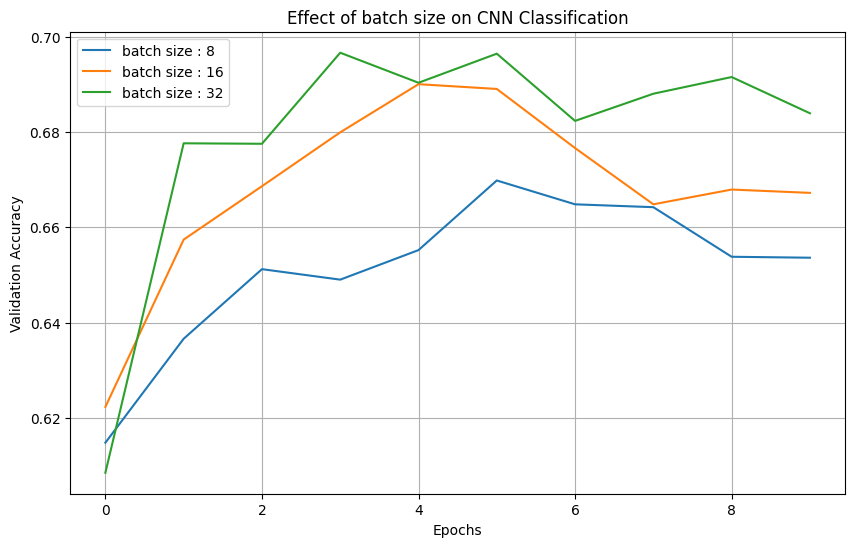

In [ ]:
acc_list = []
parameter_name = 'batch size'
parameter_list = [8, 16, 32]
for p in parameter_list:
  acc_list.append(create_and_train_model(ConvSize, ActivationFun, p))
  print("*"*100)

plott(parameter_name, parameter_list, acc_list)

## 💭Exploring the Effect of activation function on CNN Classification accuracy

- Create models with different activation function (e.g., relu, tanh, sigmoid).
- Plot the accuracy of each model against the activation function.
- Analyze the plot to understand the relationship between activation function and classification accuracy.

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3821 - accuracy: 0.5097 - val_loss: 1.1108 - val_accuracy: 0.6123
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0210 - accuracy: 0.6460 - val_loss: 0.9611 - val_accuracy: 0.6679
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8732 - accuracy: 0.7000 - val_loss: 0.9286 - val_accuracy: 0.6833
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7666 - accuracy: 0.7374 - val_loss: 0.9214 - val_accuracy: 0.6838
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6807 - accuracy: 0.7665 - val_loss: 0.9187 - val_accuracy: 0.6907
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6054 - accuracy: 0.7900 - val_loss: 0.9680 - val_accuracy: 0.6922
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5410 - accuracy: 0.8111 - val_loss: 0.9909 - val_accuracy:

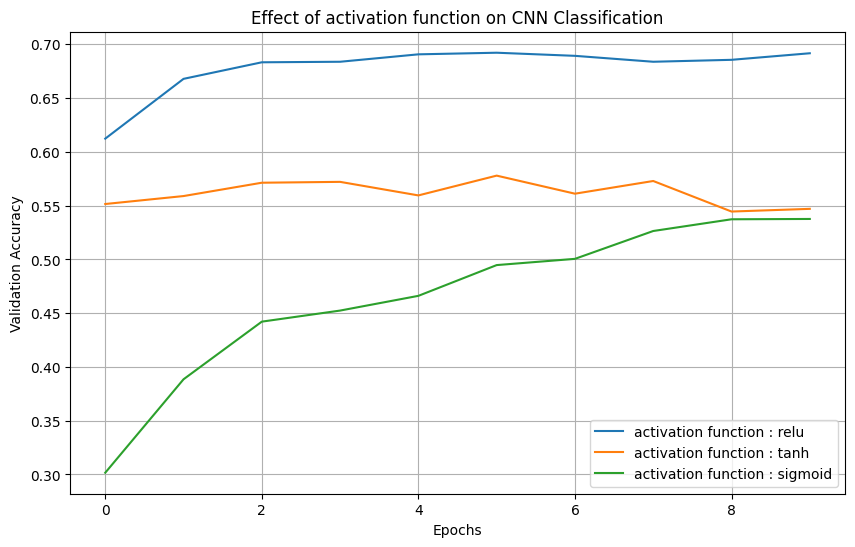

In [ ]:
acc_list = []
parameter_name = 'activation function'
parameter_list = ['relu','tanh','sigmoid']
for p in parameter_list:
  acc_list.append(create_and_train_model(ConvSize, p, BatchSize))
  print("*"*100)

plott(parameter_name, parameter_list, acc_list)

## 💭 Exploring the Effect of network depth on CNN Classification accuracy


- use the best hyper parameters that you got above  
- create new model with additional layers, train and compile it then compare the results

In [9]:
ConvSize = 3
ActivationFun = 'relu'
BatchSize = 32

In [ ]:
# create pervious model with best hyper parameters
model = models.Sequential()
model.add(layers.Conv2D(64, (ConvSize, ConvSize), activation = ActivationFun, input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation=ActivationFun))
model.add(layers.Flatten())
model.add(layers.Dense(10))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
history_1 = model.fit(X_train, y_train, batch_size= BatchSize, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.3694 - accuracy: 0.5142 - val_loss: 1.1303 - val_accuracy: 0.5967
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0156 - accuracy: 0.6494 - val_loss: 1.0554 - val_accuracy: 0.6383
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8663 - accuracy: 0.7001 - val_loss: 0.9793 - val_accuracy: 0.6724
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7581 - accuracy: 0.7402 - val_loss: 0.9124 - val_accuracy: 0.6913
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6715 - accuracy: 0.7675 - val_loss: 0.9580 - val_accuracy: 0.6869
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5922 - accuracy: 0.7960 - val_loss: 0.9573 - val_accuracy: 0.6904
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5261 - accuracy: 0.8171 - val_loss: 0.9728 - val_accuracy:

In [10]:
# create new model

model = models.Sequential()
model.add(layers.Conv2D(64, (ConvSize, ConvSize), activation = ActivationFun, input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (ConvSize, ConvSize), activation=ActivationFun))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (ConvSize, ConvSize), activation=ActivationFun))
model.add(layers.Conv2D(32, (ConvSize, ConvSize), activation=ActivationFun))

model.add(layers.Flatten())
model.add(layers.Dense(10))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
history_2 = model.fit(X_train, y_train, batch_size= BatchSize, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 16s 6ms/step - loss: 1.5806 - accuracy: 0.4180 - val_loss: 1.3091 - val_accuracy: 0.5213
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2187 - accuracy: 0.5647 - val_loss: 1.1559 - val_accuracy: 0.5776
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0609 - accuracy: 0.6238 - val_loss: 1.0359 - val_accuracy: 0.6277
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9524 - accuracy: 0.6642 - val_loss: 0.9700 - val_accuracy: 0.6531
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8723 - accuracy: 0.6922 - val_loss: 0.9202 - val_accuracy: 0.6758
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8087 - accuracy: 0.7181 - val_loss: 0.8583 - val_accuracy: 0.6990
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7488 - accuracy: 0.7382 - val_loss: 0.8652 - val_accura

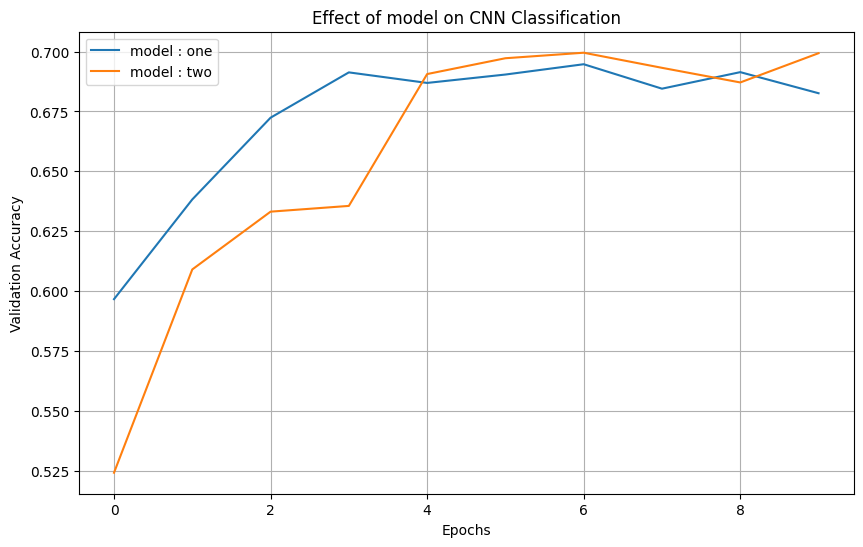

In [ ]:
parameter_name = 'model'
parameter_list = ['one','two']
accuracy_list = [history_1.history['val_accuracy'],history_2.history['val_accuracy']]
plott(parameter_name, parameter_list, accuracy_list)

_______________________

## 💭Now we using just fully connected layers for image classification

- create new model with additional layers, train and compile it 

   - Reshape the training and test data to a flattened format

   - Pay attention to the input dimention of first layer

- then compare the results with previous model(use the best hyper parameters that you saw)


In [11]:
# reshape test and train data
X_train_flattened = X_train.reshape(-1, (32 * 32 * 3))
X_test_flattened = X_test.reshape(-1, (32 * 32 * 3))

In [12]:
# creat model

model = models.Sequential()

model.add(layers.Dense(1, input_dim= X_test_flattened.shape[1], activation='sigmoid'))
model.add(layers.Dense(1024,  activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256,  activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 3073      
                                                                 
 dense_8 (Dense)             (None, 1024)              2048      
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 64)                16448     
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 678,347
Trainable params: 678,347
Non-tr

In [14]:
# compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_flattened, y_train, batch_size=32, epochs=10, 
                    validation_data=(X_test_flattened, y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.1010 - accuracy: 0.1712 - val_loss: 2.0454 - val_accuracy: 0.1956
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0550 - accuracy: 0.1893 - val_loss: 2.0334 - val_accuracy: 0.1981
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0493 - accuracy: 0.1927 - val_loss: 2.0535 - val_accuracy: 0.1909
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0461 - accuracy: 0.1940 - val_loss: 2.0268 - val_accuracy: 0.2000
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0421 - accuracy: 0.1945 - val_loss: 2.0440 - val_accuracy: 0.1925
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0417 - accuracy: 0.1942 - val_loss: 2.0433 - val_accuracy: 0.1973
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0402 - accuracy: 0.1939 - val_loss: 2.0276 - val_accuracy:

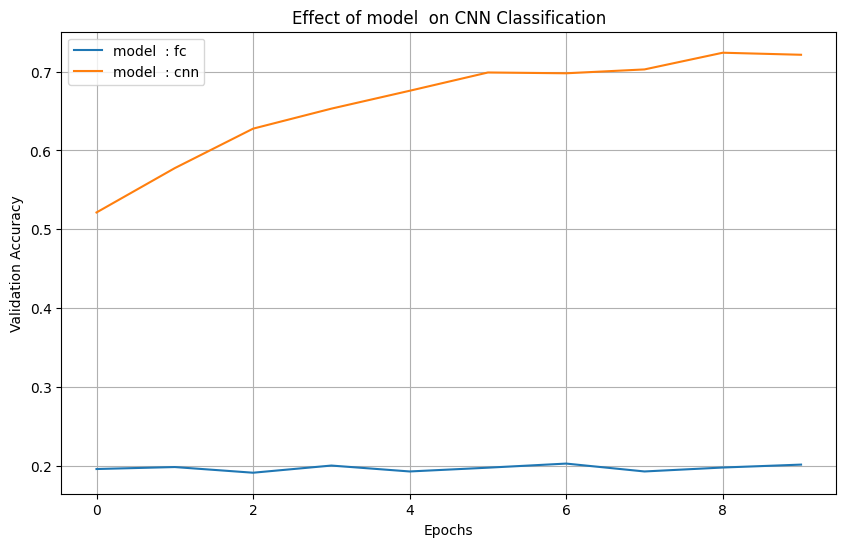

In [17]:
# plot the results
parameter_name = 'model '
parameter_list = ['fc','cnn']
accuracy_list = [history.history['val_accuracy'],history_2.history['val_accuracy']]
plott(parameter_name, parameter_list, accuracy_list)


# Applying deep neural networks for regression

## Dataset

Before starting any data analysis or modeling task, it is crucial to become familiar with the dataset that you will be working with.In this case, we will be working with the California Housing dataset, which is a popular benchmark dataset for regression tasks. This dataset is widely used in machine learning and data science courses as well as research, and it is available in the scikit-learn library. The California Housing dataset contains measurements of various features that are used to estimate the median house value (`MedHouseVal`) in California

Here's some information about the California Housing dataset:
- Samples total: 20640
- Dimensionality: 8
- Features: real
- Target: real (0.15 - 5)

### 💭 Questions
- Load dataset using `fetch_california_housing` in sklearn 
- Create features and target dataframes
- Split data to Train and Test with proportion of 80 to 20.
- Normalizing the feature variables using `StandardScaler` 

In [20]:
# load dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()

In [21]:
# create features dataframe
X_df = pd.DataFrame(housing.data, columns=housing['feature_names'])
X_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [22]:
# create target dataframe
y_df = pd.DataFrame(housing.target, columns=housing['target_names'])
y_df

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [23]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df.to_numpy(), y_df.to_numpy().ravel(), test_size=0.2)

In [24]:
# normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  💭 Notes for creating model
- Create a Sequential model.
- Set the loss function to mean squared logarithmic error (msle), suitable for regression tasks
- Use the Adam optimizer, which is an efficient optimization algorithm for training neural networks.
- Define the metric as msle, which measures the mean squared logarithmic error during training.
- train model and plot accuracy
- Define the model architecture


In [ ]:
# create deep fully connected network for regression

model = models.Sequential()
model.add(layers.Dense(1, input_dim=8, activation='sigmoid'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))




In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
 dense_38 (Dense)            (None, 64)                128       
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,250
Trainable params: 2,250
Non-trainable params: 0
_________________________________________________________________


In [26]:
# compile and train the model
model.compile(loss= 'msle',
                optimizer='adam',
                metrics=['msle'])

history = model.fit(
    X_train_scaled, 
    y_train, 
    epochs=50, 
    batch_size=32,
    validation_split=0.2
  
)

Epoch 1/50
413/413 [==============================] - 4s 5ms/step - loss: 0.1490 - msle: 0.1490 - val_loss: 0.0947 - val_msle: 0.0947
Epoch 2/50
413/413 [==============================] - 2s 4ms/step - loss: 0.0771 - msle: 0.0771 - val_loss: 0.0612 - val_msle: 0.0612
Epoch 3/50
413/413 [==============================] - 2s 4ms/step - loss: 0.0572 - msle: 0.0572 - val_loss: 0.0514 - val_msle: 0.0514
Epoch 4/50
413/413 [==============================] - 2s 4ms/step - loss: 0.0492 - msle: 0.0492 - val_loss: 0.0444 - val_msle: 0.0444
Epoch 5/50
413/413 [==============================] - 2s 4ms/step - loss: 0.0439 - msle: 0.0439 - val_loss: 0.0405 - val_msle: 0.0405
Epoch 6/50
413/413 [==============================] - 2s 4ms/step - loss: 0.0410 - msle: 0.0410 - val_loss: 0.0396 - val_msle: 0.0396
Epoch 7/50
413/413 [==============================] - 2s 5ms/step - loss: 0.0401 - msle: 0.0401 - val_loss: 0.0385 - val_msle: 0.0385
Epoch 8/50
413/413 [==============================] - 2s 4ms/s

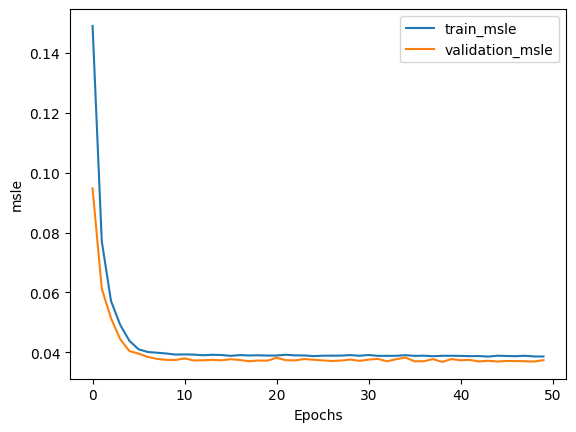

In [27]:
# plot
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend(["train_"+key, 'validation_'+key])
  plt.show()
# Plot the history
plot_history(history, 'msle')

In [28]:
# calculate accuracy and loss score for test data
score = model.evaluate(X_test_scaled, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.037530284374952316
Test accuracy: 0.037530284374952316


In [ ]:
model.predict(X_test_scaled)

129/129 [==============================] - 0s 1ms/step


array([[1.3296634],
       [2.0667725],
       [5.5953298],
       ...,
       [1.0535713],
       [1.82188  ],
       [3.6905015]], dtype=float32)